# **Section 2: K-nearest neighbor**

*Intuition:* we predict the output based on the output of the $K$ nearest neighbors.

Options for breaking ties:
* Whatever occurs first
* Random
* Weight by distance

We will use the MNIST dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshaping arrays in the usual feature matrix form
train_X = train_X.reshape(len(train_X),28*28) / 255.
test_X = test_X.reshape(len(test_X),28*28) / 255.

In [ ]:
class KNearestNeighbor:
  def __init__(self,K):
    self.K = K

  def fit(self,X,y):
    self.X = X
    self.y = y
    self.ncat = len(set(self.y))

  def predict(self,X):
    if X.ndim == 1:
      X = X.reshape((1,len(X)))
    predictions = np.zeros(len(X))
    for i,x in enumerate(X):
      neighbors = []
      # first calculate the K nearest neighbors
      for x_train,y_train in zip(self.X,self.y):
        diff = x-x_train
        # using squared distances
        dist2 = diff.T @ diff
        # append if list of neighbours is empty
        if not neighbors:
          neighbors.append((dist2,y_train))

        # iterating over a sorted list of neighbours
        for j,n in enumerate(neighbors):
          # if smaller, than a given element, insert
          if dist2 < n[0]:
            neighbors.insert(j,(dist2,y_train))
            # if we overshoot the max number of neighbors, remove the farthest one
            if len(neighbors) > self.K:
              neighbors.pop()
            break

      # convert nearest neighbours to votes
      votes = np.zeros((self.ncat,1))
      for n in neighbors:
        votes[n[1]] += 1

      predictions[i] = np.argmax(votes)
    return predictions

  def score(self,X,y):
    P = self.predict(X)
    return np.mean( y == P )

Checking the accuracy as a function of $K$. I found that $K = 1$ is already pretty effective. However, using a too large $K$ value, the model starts to underfit and the accuracy starts to drop. Also the KNN prediction is very inefficient, takes a lot of time to run.

In [ ]:
scores = []
for K in range(1,20):
  model = KNearestNeighbor(K)
  model.fit(train_X[:5000],train_y[:5000])
  scores.append(model.score(test_X[:1000,:],test_y[:1000]))
  del model


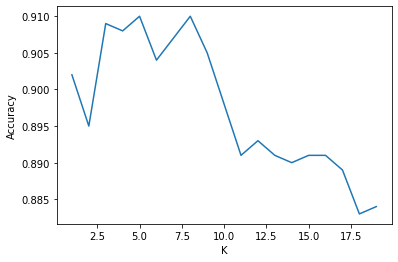

In [ ]:
plt.plot(range(1,20),scores)
plt.ylabel('Accuracy')
plt.xlabel('K');

## **When KNN can fail**

KNN will fail e.g. in a lattice of alternating points

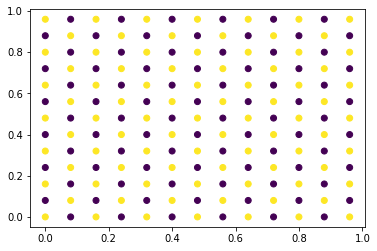

In [ ]:
X = []
y = []

for i in range(0,25,2):
  for j in range(0,25,2):
    X.append([i,j])
    y.append(1) if (i+j) % 4 == 0 else y.append(0)


# Normalizing features to [0,1] region
X = np.array(X) / 25.

plt.scatter(X[:,0],X[:,1],c=y);

In [ ]:
scores = []
for K in range(1,100):
  model = KNearestNeighbor(K)
  model.fit(X,y)
  scores.append(model.score(X,y))
  del model

By checking that accuracy with respect to $K$, we can see that at certain values, the classifier is really inefficient. But when we increase $K$, farther points with the same class will be also considered, fixing the predictions.

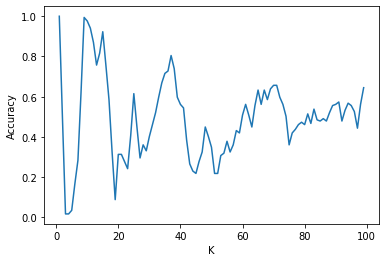

In [ ]:
plt.plot(range(1,100),scores)
plt.ylabel('Accuracy')
plt.xlabel('K');

In particular, $K = 3$ is completely wrong:

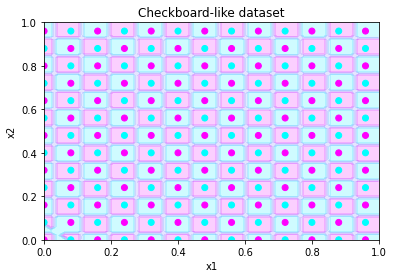

In [ ]:
model = KNearestNeighbor(3)
model.fit(X,y)

x_plot = y_plot = np.linspace(0.0, 1.0, 50)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(50,50)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='Checkboard-like dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool');

On the other hand, $K = 10$ works well with this dataset.

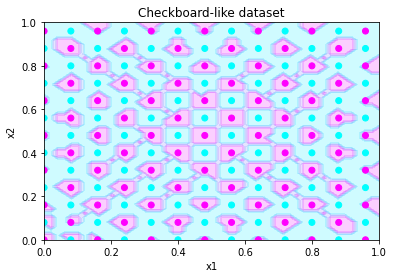

In [ ]:
model = KNearestNeighbor(10)
model.fit(X,y)

x_plot = y_plot = np.linspace(0.0, 1.0, 50)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(50,50)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='Checkboard-like dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool');

## **KNN for the XOR problem**

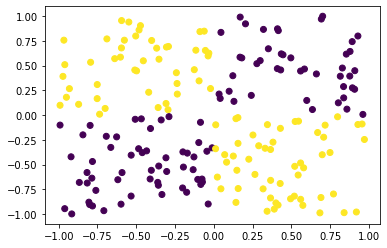

In [ ]:
# Generating the XOR dataset

N = 200
X = (2*np.random.random((N,2)) - 1)
Y = np.zeros(N)
Y = (X[:,0] > 0) ^ (X[:,1] > 0)
Y = Y.astype('int')
plt.scatter(X[:,0],X[:,1],c=Y);

KNN works well on the XOR dataset with small K:

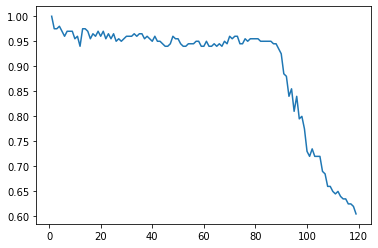

In [ ]:
score = []

for i in range(1,120):
  model = KNearestNeighbor(i)
  model.fit(X,Y)
  score.append(model.score(X,Y))
  del model

plt.plot(range(1,120),score)

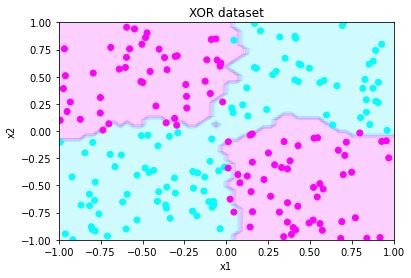

In [ ]:
model = KNearestNeighbor(10)
model.fit(X,Y)

x_plot = y_plot = np.linspace(-1.0, 1.0, 50)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(50,50)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='XOR dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');

However, when using a too large K, we will underfit.

In [ ]:
model = KNearestNeighbor(120)
model.fit(X,Y)

x_plot = y_plot = np.linspace(-1.0, 1.0, 50)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(50,50)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='XOR dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');

On the other hand, with a too small $K$, we might overfit (this is not really a problem in this case):

In [ ]:
model = KNearestNeighbor(1)
model.fit(X,Y)

x_plot = y_plot = np.linspace(-1.0, 1.0, 50)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(50,50)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='XOR dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');

## **KNN on the donut problem**

Generating the donut dataset:

In [ ]:
N = 400

#Set mean radii for the two categories
R1 = 10.0
R2 = 20.0

#Set variance of radii for the two categories
std1 = 1.0
std2 = 1.0

x1 = []
x2 = []
y = []

# Sample radii for both categories
r1 = R1 + std1*np.random.randn(N)
r2 = R2 + std2*np.random.randn(N)

# Sample angles
theta1 = np.random.uniform(0,2*np.pi,N)
theta2 = np.random.uniform(0,2*np.pi,N)

# Going from polar coordinates to cartesian coordinates
x1.extend(r1*np.cos(theta1))
x2.extend(r1*np.sin(theta1))
y.extend(np.ones(N,dtype=int))
x1.extend(r2*np.cos(theta2))
x2.extend(r2*np.sin(theta2))
y.extend(np.zeros(N,dtype=int))

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular
plt.scatter(x1,x2,c=y);

In [ ]:
X = np.array([x1,x2]).T
Y = np.array(y)

If we choose too large $K$, the efficiency drops, because we start to mix the two classes in the predictions

In [ ]:
score = []

for i in range(1,500,10):
  model = KNearestNeighbor(i)
  model.fit(X,Y)
  score.append(model.score(X,Y))

plt.plot(range(1,500,10),score)

In [ ]:
model = KNearestNeighbor(20)
model.fit(X,Y)

x_plot = y_plot = np.linspace(-25.0, 25.0, 50)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(50,50)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The donut dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');

## **Exercise: improve KNN**

There are two approaches to improve KNN:
1. Algorithmic:
  * KD-Trees: A quick method to search for nearest neighbours. Based upon a tree constructed from a continuously bisecting into two half planes. However, this is not very efficient for datasets with high dimension feature space. KD-Trees are implemented in Scipy.
  * Dimensionality reduction: reduce the feature space to a more relevant, lower dimensional, derived feature space. I'll implement this
2. Programmatic:
  * Dot product
  * NumPy methods

### **Principal component analysis (PCA)**

Principal component analysis derives new features by looking for the directions of maximum variance in the dataset. Based on these results, an orthogonal linear transformation can be used to reduce the dimension of the data. Mathematically, this is achieved by looking for the $v$ eigenvectors of the covariance matrix $V$:
\begin{align}
Vv = \lambda v.
\end{align}
Introducing the $W$ matrix which columns corresponds to the eigenvectors of $V$ and the $\Lambda$ matrix, which is a diagonal matrix with the eigenvalues in the diagonals.
The covariance matrix is estimated using the sample covariance formula:
\begin{align}
V_{jk} = \frac{1}{N-1} \sum_{i=1}^{N} (x_{ij}-\overline{x}_j) (x_{ik}-\overline{x}_k).
\end{align}
We might project the data to a lower dimensional feature space by
\begin{align}
X' = XW_L,
\end{align}
where $W_L$ is the matrix containing eigenvectors corresponding to the $L$ largest absolute value eigenvalues. The dimensions of $X$ are $N \times D$ and $W_L$ is $D \times L$. Therefore, $X'$ have the dimensions of $X \times L$, thus this is a dimension reduction as $L < D'$.

In [ ]:
class PCA:
  # In case of PCA, fit stands for the calculation of the eigenvectors
  def fit(self,X):
    # First calculating the unbiased sample covariance
    N = len(X)
    D = len(X[0])
    Mu = np.mean(X,axis=1)
    Ones = np.ones(N)
    V = 1. / (N - 1) * (X - Ones @ Mu).T @ (X - Ones @ Mu)
    Lambda, self.W = np.linalg.eigh(V)

    # Sorting eigenvectors according to eigenvalues
    idx = Lambda.argsort()[::-1]   
    self.W = self.W[:,idx]

  def transform(self,X,L):
    return X @ self.W[:,:L]

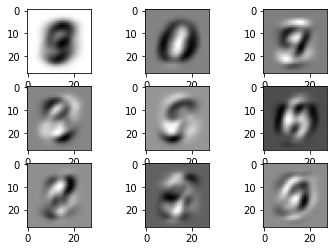

In [ ]:
dimension_reductor = PCA()
dimension_reductor.fit(train_X)

# Checking the first nine eigenvectors, reshaped into an image format
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(dimension_reductor.W[:,i].reshape((28,28)),cmap='gray')

Reducing the dimensionality of both the test and the train set. We are using only 10 principal components, thus we reduced the matrix $X$ dimensions from $N \times 768$ to $N \times 10$.

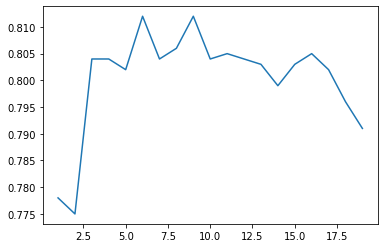

In [ ]:
train_Xr = dimension_reductor.transform(train_X,10)
test_Xr = dimension_reductor.transform(test_X,10)

score = []
for i in range(1,20):
  model = KNearestNeighbor(i)
  model.fit(train_Xr[:1000],train_y[:1000])
  #model.score(test_Xr[:1000],test_y[:1000])
  score.append(model.score(test_Xr[:1000],test_y[:1000]))

plt.plot(range(1,20),score);

We might achieve a better results when using more principal components. There is a trade-off between accuracy and 

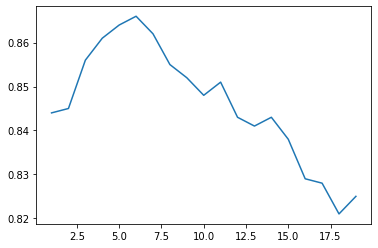

In [ ]:
train_Xr = dimension_reductor.transform(train_X,20)
test_Xr = dimension_reductor.transform(test_X,20)

score = []
for i in range(1,20):
  model = KNearestNeighbor(i)
  model.fit(train_Xr[:1000],train_y[:1000])
  #model.score(test_Xr[:1000],test_y[:1000])
  score.append(model.score(test_Xr[:1000],test_y[:1000]))

plt.plot(range(1,20),score);